In [73]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt


In [74]:
images = glob.glob('images/*.jpg')

In [75]:
# Termination criteria for the iterative optimization process
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Define a grid of 3D object points for a 7x7 pattern
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in the image plane.

In [76]:
GRIDSIZE = 30   ## 30 mm  -  (Chessboard rectangle real size)

# Define a grid of 3D object points using the GRIDSIZE (30 mm) as the step size 
objp[:, :2] = np.mgrid[0:7*GRIDSIZE:GRIDSIZE, 0:7*GRIDSIZE:GRIDSIZE].T.reshape(-1, 2)
print(objp)


[[  0.   0.   0.]
 [ 30.   0.   0.]
 [ 60.   0.   0.]
 [ 90.   0.   0.]
 [120.   0.   0.]
 [150.   0.   0.]
 [180.   0.   0.]
 [  0.  30.   0.]
 [ 30.  30.   0.]
 [ 60.  30.   0.]
 [ 90.  30.   0.]
 [120.  30.   0.]
 [150.  30.   0.]
 [180.  30.   0.]
 [  0.  60.   0.]
 [ 30.  60.   0.]
 [ 60.  60.   0.]
 [ 90.  60.   0.]
 [120.  60.   0.]
 [150.  60.   0.]
 [180.  60.   0.]
 [  0.  90.   0.]
 [ 30.  90.   0.]
 [ 60.  90.   0.]
 [ 90.  90.   0.]
 [120.  90.   0.]
 [150.  90.   0.]
 [180.  90.   0.]
 [  0. 120.   0.]
 [ 30. 120.   0.]
 [ 60. 120.   0.]
 [ 90. 120.   0.]
 [120. 120.   0.]
 [150. 120.   0.]
 [180. 120.   0.]
 [  0. 150.   0.]
 [ 30. 150.   0.]
 [ 60. 150.   0.]
 [ 90. 150.   0.]
 [120. 150.   0.]
 [150. 150.   0.]
 [180. 150.   0.]
 [  0. 180.   0.]
 [ 30. 180.   0.]
 [ 60. 180.   0.]
 [ 90. 180.   0.]
 [120. 180.   0.]
 [150. 180.   0.]
 [180. 180.   0.]]


images\IMG_20231026_161207.jpg


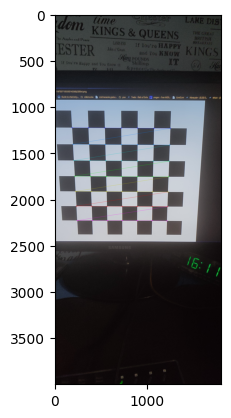

images\IMG_20231026_161213.jpg


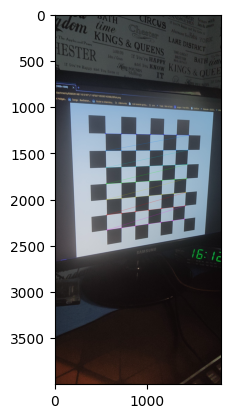

images\IMG_20231026_161216.jpg


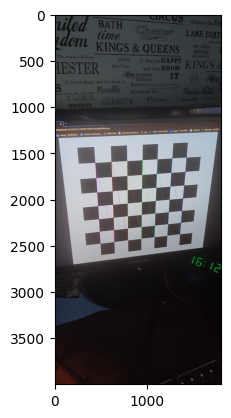

images\IMG_20231026_161219.jpg


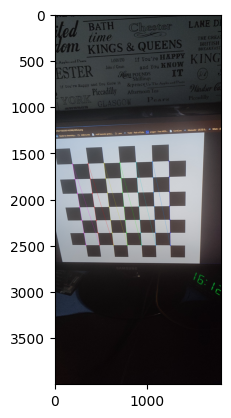

images\IMG_20231026_161226.jpg


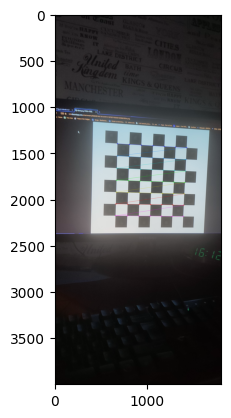

images\IMG_20231026_161230.jpg


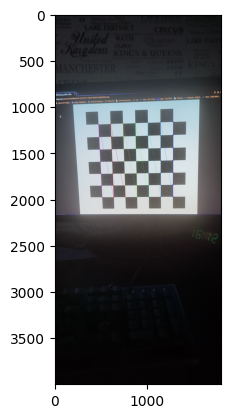

images\IMG_20231026_161234.jpg


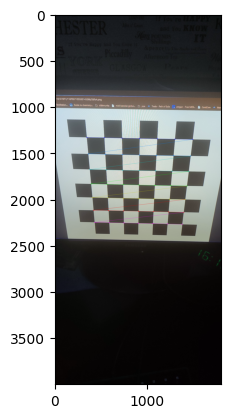

images\IMG_20231026_161241.jpg


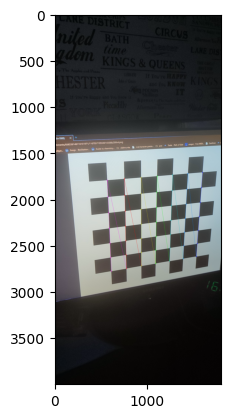

images\IMG_20231026_161245.jpg


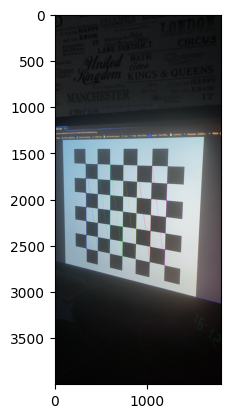

images\IMG_20231026_161249.jpg


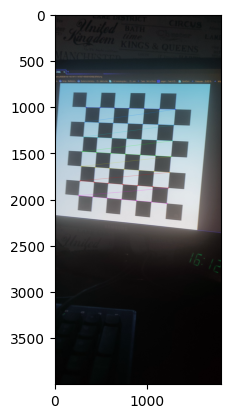

images\IMG_20231026_161253.jpg


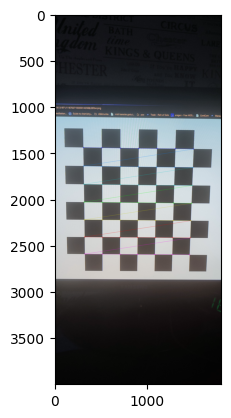

images\IMG_20231026_161258.jpg


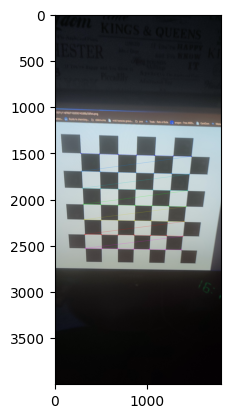

images\IMG_20231026_161301.jpg


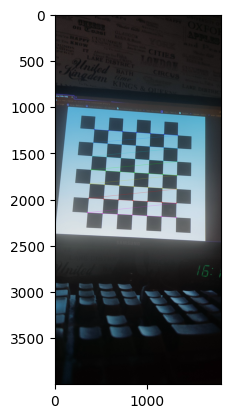

images\IMG_20231026_161304.jpg


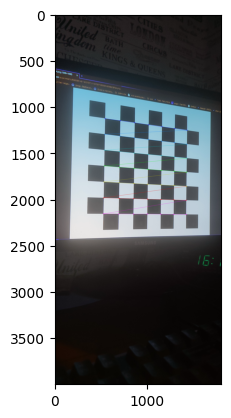

images\IMG_20231026_161307.jpg


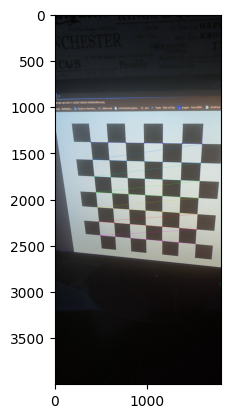

images\IMG_20231026_161317.jpg


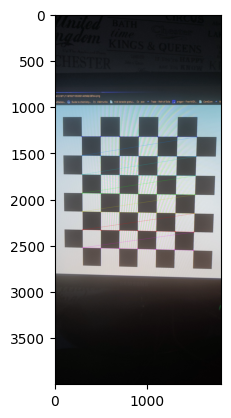

images\IMG_20231026_161321.jpg


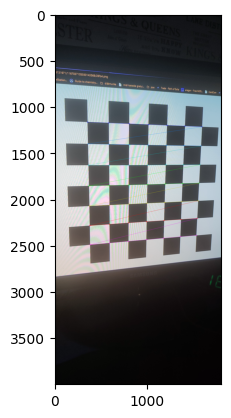

images\IMG_20231026_161325.jpg


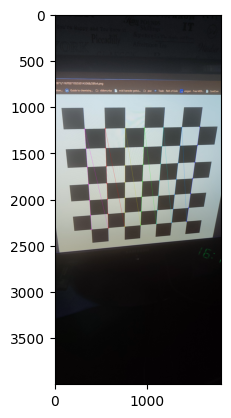

In [77]:
# We need at least 10 images
# Consider an image of a chess board.
# The important input data needed for calibration of the camera is the set of 3D real world points and the corresponding 2D coordinates of these points in the image
# 2D image points are OK which we can easily find from the image. (These image points are locations where two black squares touch each other in chess boards)

# Loop through a list of image file names (assumed to be chessboard images)
for fname in images:
    # Read the image
    img = cv.imread(fname)
    print(fname)

    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Define the size of the chessboard pattern
    chessboardSize = (7, 7)

    # Find the chessboard corners in the grayscale image
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    # If chessboard corners are found in the image
    if ret == True:
        # Add the 3D object points (objp) to the objpoints list
        objpoints.append(objp)

        # Refine the corner positions for sub-pixel accuracy
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        # Add the 2D image points (corners2) to the imgpoints list
        imgpoints.append(corners2)

        # Draw and display the detected corners on the image
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        plt.imshow(img)
        plt.show()





In [78]:
# Perform camera calibration using the provided object and image points
# The calibration process estimates the intrinsic and extrinsic camera parameters

# The following variables are returned by cv.calibrateCamera:
# ret: Reprojection error, a measure of calibration quality
# mtx: Camera intrinsic matrix, including focal lengths and principal point
# dist: Distortion coefficients for correcting lens distortion
# rvecs: Rotation vectors for each input image
# tvecs: Translation vectors for each input image
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [79]:
# Load an image from the specified file
img = cv.imread('images\IMG_20231026_161245.jpg')

# Get the dimensions of the image (height and width)
h, w = img.shape[:2]

# Calculate a new camera matrix and a region of interest (ROI) for image rectification
# using the camera intrinsic matrix (mtx), distortion coefficients (dist), and the image size (w, h)
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))


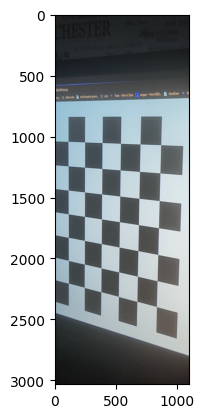

In [80]:
# Undistort the original image using the camera intrinsic matrix (mtx), distortion coefficients (dist),
# and the new camera matrix (newcameramtx) obtained after calibration
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# Crop the undistorted image based on the region of interest (roi)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

# Display the undistorted and cropped image using matplotlib
plt.imshow(dst)
plt.show()


In [81]:
# Print the dimensions (shape) of the resulting undistorted and cropped image
print(dst.shape)

(3033, 1102, 3)


In [82]:
# Print the 3D coordinates of the first corner of the first image's object points
print("1st image 1st corner 3D coordinates: ", np.asarray(objpoints)[0, 0, :])

# Convert the image points (imgpoints) to a NumPy array and reshape it
imgpointsnp = np.asarray(imgpoints).reshape(-1, 42, 2)

# Print the 2D coordinates of the first corner of the first image's image points
print("1st image 1st corner 2D coordinates: ", imgpointsnp[0, 0, :])


1st image 1st corner 3D coordinates:  [0. 0. 0.]
1st image 1st corner 2D coordinates:  [ 184.41322 1229.0588 ]


In [83]:
# Print the resolution of the grayscale image (height and width)
print("Image resolution: ", gray.shape)

# Print the focal length in the x-direction (horizontal)
# This value represents how much the image is zoomed in the horizontal direction.
print("Focal length x: ", mtx[0, 0])

# Print the focal length in the y-direction (vertical)
# This value represents how much the image is zoomed in the vertical direction.
print("Focal length y: ", mtx[1, 1])

# Print the x-coordinate of the principal point (optical center) on the image sensor
# The principal point is the point where the optical axis intersects the image sensor.
# It typically represents the center of the image.
print("Principal point x: ", mtx[0, 2])

# Print the y-coordinate of the principal point on the image sensor
print("Principal point y: ", mtx[1, 2])


Image resolution:  (4000, 1800)
Focal length x:  2883.1978696770657
Focal length y:  2884.9904023215017
Principal point x:  900.794614678023
Principal point y:  2000.688180463785


In [84]:
print("Skew: ", mtx[0,1])

Skew:  0.0


In [85]:
# Convert the translation vectors (tvecs) to a NumPy array and reshape it
tvecsnp = np.asarray(tvecs).reshape(-1, 3)

# Print the translation vector of the first image
print("First image translation vector: ", tvecsnp[0, :])


First image translation vector:  [-121.74653993 -131.00879042  493.06231531]


In [86]:
# Convert the rotation vectors (rvecs) to a NumPy array and reshape it
rvecsnp = np.asarray(rvecs).reshape(-1, 3)

# Print the rotation vector of the first image
print("First image rotation vector: ", rvecsnp[0, :])


First image rotation vector:  [ 0.2602524  -0.0042247   0.00569957]


In [88]:
# Print the new camera matrix (after calibration) that can be used for rectification
print("New Camera Matrix (newcameramtx):")
print(newcameramtx)

# Print the reprojection error (ret) from the calibration process
# The reprojection error is a measure of the calibration's quality.
print("Reprojection Error (ret):")
print(ret)

# Print the camera intrinsic matrix (mtx) obtained from calibration
# This matrix includes focal lengths and the principal point.
print("Camera Intrinsic Matrix (mtx):")
print(mtx)

# Print the distortion coefficients (dist) obtained from calibration
# These coefficients describe lens distortion in the camera.
print("Distortion Coefficients (dist):")
print(dist)

# Print the translation vectors (tvecs) obtained from calibration
# These vectors describe the camera's position in the world coordinate system for each image.
print("Translation Vectors (tvecs):")
print(tvecs)

# Print the region of interest (roi) obtained from calibration
# The region of interest is the portion of the image that can be used after rectification.
print("Region of Interest (roi):")
print(roi)


New Camera Matrix (newcameramtx):
[[2.89947673e+03 0.00000000e+00 9.01184793e+02]
 [0.00000000e+00 3.59329811e+03 1.99697482e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Reprojection Error (ret):
0.46859221275089724
Camera Intrinsic Matrix (mtx):
[[2.88319787e+03 0.00000000e+00 9.00794615e+02]
 [0.00000000e+00 2.88499040e+03 2.00068818e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients (dist):
[[ 2.18788878e-01 -2.21056980e+00 -1.21634724e-03  4.19600087e-04
   6.79437467e+00]]
Translation Vectors (tvecs):
(array([[-121.74653993],
       [-131.00879042],
       [ 493.06231531]]), array([[ -58.35423803],
       [-116.0405847 ],
       [ 476.45497494]]), array([[ 95.35479029],
       [-82.73887088],
       [535.09060751]]), array([[ 54.83588221],
       [-68.6462149 ],
       [485.08520546]]), array([[ -52.12249242],
       [-137.20160004],
       [ 664.87962546]]), array([[  81.74547148],
       [-182.79583032],
       [ 637.95015731]]), array([[ -88.